# Give me some Credit

**Data**

**SeriousDlqin2yrs:** Person experienced 90 days past due delinquency or worse

**RevolvingUtilizationOfUnsecuredLines:** Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits

**age:** Age of borrower in years

**NumberOfTime30-59DaysPastDueNotWorse:** Number of times borrower has been 30-59 days past due but no worse in the last 2 years.

**DebtRatio:** Monthly debt payments, alimony,living costs divided by monthy gross income

**MonthlyIncome:** Monthly income

**NumberOfOpenCreditLinesAndLoans:** Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)

**NumberOfTimes90DaysLate:** Number of times borrower has been 90 days or more past due.

**NumberRealEstateLoansOrLines:** Number of mortgage and real estate loans including home equity lines of credit

**NumberOfTime60-89DaysPastDueNotWorse:** Number of times borrower has been 60-89 days past due but no worse in the last 2 years.

**NumberOfDependents:** Number of dependents in family excluding themselves (spouse, children etc.)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
credit_df = pd.read_csv("data/cs-training.csv")
credit_test_df = pd.read_csv("data/cs-test.csv")

In [6]:
credit_test_df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


## Data Exploration

In [7]:
# drop the row id column 
credit_df =credit_df.drop(credit_df.columns[0],axis=1)
credit_test_df =credit_test_df.drop(credit_test_df.columns[0],axis=1)

In [8]:
credit_df.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [9]:
credit_df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [10]:
credit_test_df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,0.0,101503.000000,101503.000000,101503.000000,101503.000000,8.140000e+04,101503.000000,101503.000000,101503.000000,101503.000000,98877.000000
mean,NaN,5.310000,52.405436,0.453770,344.475020,6.855036e+03,8.453514,0.296691,1.013074,0.270317,0.769046
std,NaN,196.156039,14.779756,4.538487,1632.595231,3.650860e+04,5.144100,4.515859,1.110253,4.503578,1.136778
min,NaN,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,0.030131,41.000000,0.000000,0.173423,3.408000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,0.152586,52.000000,0.000000,0.364260,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,NaN,0.564225,63.000000,0.000000,0.851619,8.200000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,NaN,21821.000000,104.000000,98.000000,268326.000000,7.727000e+06,85.000000,98.000000,37.000000,98.000000,43.000000


### Cómo de desbalanceada está la variable de salida: SeriousDlqin2yrs

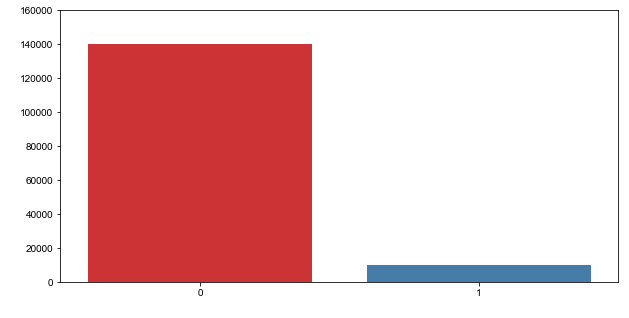

In [11]:
ax = sns.countplot(x = credit_df.SeriousDlqin2yrs ,palette="Set1")
sns.set(font_scale=1.5)
ax.set_ylim(top = 150000)
ax.set_xlabel(' ')
ax.set_ylabel(' ')
fig = plt.gcf()
fig.set_size_inches(10,5)
ax.set_ylim(top=160000)
plt.show()

### NumberOfTime60-89DaysPastDueNotWorse, NumberOfTime30-59DaysPastDueNotWorse, NumberOfTimes90DaysLate : sustituir Outliers por la media

In [12]:
from collections import Counter
Counter(credit_df['NumberOfTime60-89DaysPastDueNotWorse'])

Counter({0: 142396,
         1: 5731,
         2: 1118,
         3: 318,
         4: 105,
         5: 34,
         6: 16,
         7: 9,
         8: 2,
         9: 1,
         11: 1,
         96: 5,
         98: 264})

In [13]:
Counter(credit_df['NumberOfTime30-59DaysPastDueNotWorse'])

Counter({0: 126018,
         1: 16033,
         2: 4598,
         3: 1754,
         4: 747,
         5: 342,
         6: 140,
         7: 54,
         8: 25,
         9: 12,
         10: 4,
         11: 1,
         12: 2,
         13: 1,
         96: 5,
         98: 264})

In [14]:
Counter(credit_df['NumberOfTimes90DaysLate'])

Counter({0: 141662,
         1: 5243,
         2: 1555,
         3: 667,
         4: 291,
         5: 131,
         6: 80,
         7: 38,
         8: 21,
         9: 19,
         10: 8,
         11: 5,
         12: 2,
         13: 4,
         14: 2,
         15: 2,
         17: 1,
         96: 5,
         98: 264})

In [15]:
def removeAndPutMedian(data):
    Media = []
    med = data.median()
    for val in data:
        if ((val == 98) | (val == 96)):
            Media.append(med)
        else:
            Media.append(val)
            
    return Media

In [16]:
credit_df['NumberOfTime60-89DaysPastDueNotWorse'] = removeAndPutMedian(credit_df['NumberOfTime60-89DaysPastDueNotWorse'])
credit_df['NumberOfTime30-59DaysPastDueNotWorse']=removeAndPutMedian(credit_df['NumberOfTime30-59DaysPastDueNotWorse'])
credit_df['NumberOfTimes90DaysLate']=removeAndPutMedian(credit_df['NumberOfTimes90DaysLate'])

In [17]:
credit_test_df['NumberOfTime60-89DaysPastDueNotWorse'] = removeAndPutMedian(credit_test_df['NumberOfTime60-89DaysPastDueNotWorse'])
credit_test_df['NumberOfTime30-59DaysPastDueNotWorse']=removeAndPutMedian(credit_test_df['NumberOfTime30-59DaysPastDueNotWorse'])
credit_test_df['NumberOfTimes90DaysLate']=removeAndPutMedian(credit_test_df['NumberOfTimes90DaysLate'])

### RevolvingUtilizationOfUnsecuredLines: eliminar Outliers

In [18]:
#desviación tipica muy alta
credit_df['RevolvingUtilizationOfUnsecuredLines'].max()

50708.0

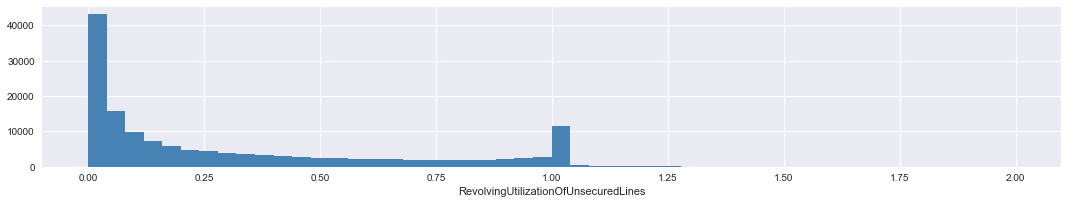

In [19]:
sns.set(style="darkgrid")
g = sns.FacetGrid(credit_df[credit_df['RevolvingUtilizationOfUnsecuredLines']<2], margin_titles=True,aspect=5)
g.map(plt.hist, "RevolvingUtilizationOfUnsecuredLines", color="steelblue", bins=50, lw=0)
plt.show()

In [20]:
credit_df['RevolvingUtilizationOfUnsecuredLines'][credit_df['RevolvingUtilizationOfUnsecuredLines']>2].count()

371

In [21]:
Revol= []
for val in credit_df['RevolvingUtilizationOfUnsecuredLines']:
    if val <= 2:
        Revol.append(val)
    else:
        Revol.append(2)
credit_df['RevolvingUtilizationOfUnsecuredLines']=Revol

In [22]:
Revol= []
for val in credit_test_df['RevolvingUtilizationOfUnsecuredLines']:
    if val <= 2:
        Revol.append(val)
    else:
        Revol.append(2)
credit_test_df['RevolvingUtilizationOfUnsecuredLines']=Revol

### age: eliminamos un outlier en 0

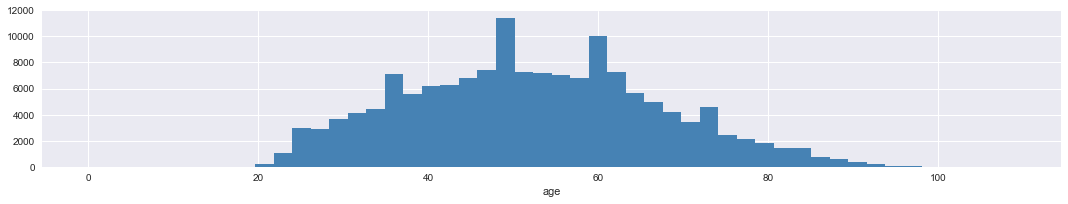

In [23]:
sns.set(style="darkgrid")
g = sns.FacetGrid(credit_df, margin_titles=True,aspect=5)
g.map(plt.hist, "age", color="steelblue", bins=50, lw=0)
plt.show()

In [24]:
credit_df['age'][credit_df['age']<20]

65695    0
Name: age, dtype: int64

In [25]:
credit_df['age'].max()

109

In [26]:
age= []
for val in credit_df['age']:
    if val <20:
        age.append(20)
    else:
        age.append(val)
credit_df['age']=age

In [27]:
age= []
for val in credit_test_df['age']:
    if val <20:
        age.append(20)
    else:
        age.append(val)
credit_test_df['age']=age

### DebtRatio

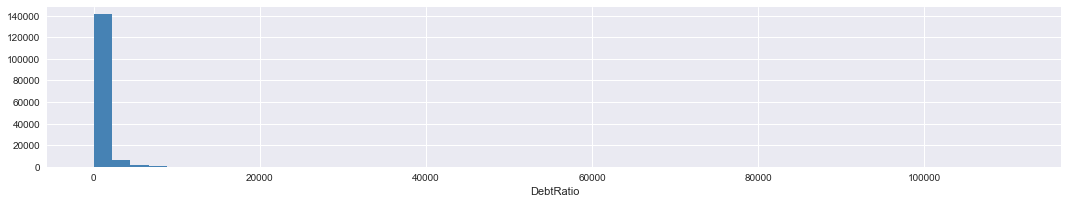

In [28]:
sns.set(style="darkgrid")
g = sns.FacetGrid(credit_df[credit_df["DebtRatio"]<150000], margin_titles=True,aspect=5)
g.map(plt.hist, "DebtRatio", color="steelblue", bins=50, lw=0)
plt.show()

In [29]:
num= []
for val in credit_df["DebtRatio"]:
    if val <150000:
        num.append(val)
    else:
        num.append(150000)
credit_df["DebtRatio"]=num

In [30]:
num= []
for val in credit_test_df["DebtRatio"]:
    if val <150000:
        num.append(val)
    else:
        num.append(150000)
credit_test_df["DebtRatio"]=num

### NumberOfOpenCreditLinesAndLoans

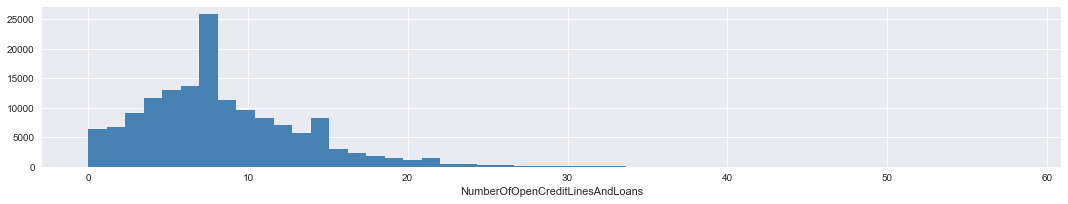

In [31]:
sns.set(style="darkgrid")
g = sns.FacetGrid(credit_df, margin_titles=True,aspect=5)
g.map(plt.hist, "NumberOfOpenCreditLinesAndLoans", color="steelblue", bins=50, lw=0)
plt.show()

In [32]:
num= []
for val in credit_df["NumberOfOpenCreditLinesAndLoans"]:
    if val <45:
        num.append(val)
    else:
        num.append(45)
credit_df["NumberOfOpenCreditLinesAndLoans"]=num

In [33]:
num= []
for val in credit_test_df["NumberOfOpenCreditLinesAndLoans"]:
    if val <45:
        num.append(val)
    else:
        num.append(45)
credit_test_df["NumberOfOpenCreditLinesAndLoans"]=num

### NumberRealEstateLoansOrLines

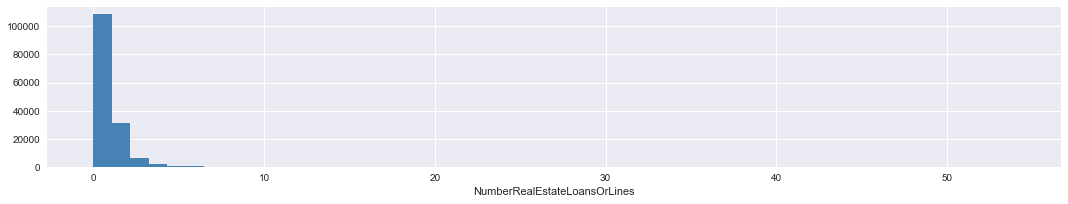

In [34]:
sns.set(style="darkgrid")
g = sns.FacetGrid(credit_df, margin_titles=True,aspect=5)
g.map(plt.hist, "NumberRealEstateLoansOrLines", color="steelblue", bins=50, lw=0)
plt.show()

### NumberOfDependents

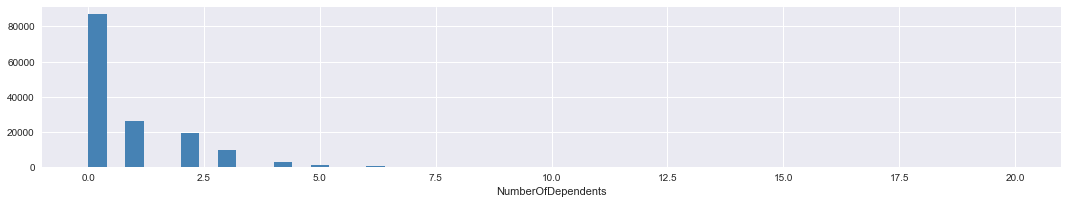

In [35]:
sns.set(style="darkgrid")
g = sns.FacetGrid(credit_df, margin_titles=True,aspect=5)
g.map(plt.hist, "NumberOfDependents", color="steelblue", bins=50, lw=0)
plt.show()

In [36]:
num= []
for val in credit_df["NumberOfDependents"]:
    if val <10:
        num.append(val)
    else:
        num.append(10)
credit_df["NumberOfDependents"]=num

In [37]:
num= []
for val in credit_test_df["NumberOfDependents"]:
    if val <10:
        num.append(val)
    else:
        num.append(10)
credit_test_df["NumberOfDependents"]=num

In [38]:
#Sustituimos los NAs por la media
credit_df["NumberOfDependents"].fillna(credit_df["NumberOfDependents"].median(), inplace=True)
credit_test_df["NumberOfDependents"].fillna(credit_test_df["NumberOfDependents"].median(), inplace=True)

### MonthlyIncome

Construimos un modelo KNeighborsRegressor para predecir los valores NAs

In [19]:
train = credit_df[credit_df.MonthlyIncome.isnull() == False]
test = credit_df[credit_df.MonthlyIncome.isnull() == True]

In [20]:
train.shape, test.shape

((120269, 11), (29731, 11))

In [21]:
X_train = train.drop(['MonthlyIncome', 'SeriousDlqin2yrs'], axis=1)
y_train = train.MonthlyIncome
X_test = test.drop(['MonthlyIncome', 'SeriousDlqin2yrs'], axis=1)

In [191]:
#from sklearn.linear_model import LinearRegression
#lmMod = LinearRegression(fit_intercept=True, normalize=True).fit(X_train, y_train)
#pred = lmMod.predict(X_test)

In [22]:
from sklearn.neighbors import KNeighborsRegressor
knnMod = KNeighborsRegressor(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30,
                             p=2, metric='minkowski', metric_params=None)

In [24]:
knnMod.fit(X_train, y_train)
pred = knnMod.predict(X_test)

In [25]:
predNoZero = []
for val in pred:
    if val >= 0:
        predNoZero.append(val)
    else:
        predNoZero.append(0.)
        

testFull = credit_df[credit_df.MonthlyIncome.isnull() == True]
testFull['MonthlyIncome'] = predNoZero

C:\Users\anaalbcru\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [26]:
monNew = []
for index in credit_df.index:
    if credit_df.MonthlyIncome[index].is_integer() == True:
        monNew.append(credit_df.MonthlyIncome[index])
    else:
        monNew.append(testFull.MonthlyIncome[index])
        
credit_df.MonthlyIncome = monNew

In [27]:
credit_df.MonthlyIncome.describe()

count    1.500000e+05
mean     5.427492e+03
std      1.314716e+04
min      0.000000e+00
25%      1.874000e+03
50%      4.435000e+03
75%      7.400000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

In [28]:
#Realizamos el mismo proceso para el conjunto de test
train = credit_test_df[credit_test_df.MonthlyIncome.isnull() == False]
test = credit_test_df[credit_test_df.MonthlyIncome.isnull() == True]

In [29]:
train.shape, test.shape

((81400, 11), (20103, 11))

In [30]:
X_train = train.drop(['MonthlyIncome', 'SeriousDlqin2yrs'], axis=1)
y_train = train.MonthlyIncome
X_test = test.drop(['MonthlyIncome', 'SeriousDlqin2yrs'], axis=1)

In [31]:
#lmMod = LinearRegression(fit_intercept=True, normalize=True).fit(X_train, y_train)
#pred = lmMod.predict(X_test)

In [32]:
from sklearn.neighbors import KNeighborsRegressor
knnMod = KNeighborsRegressor(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30,
                             p=2, metric='minkowski', metric_params=None)

knnMod.fit(X_train, y_train)
pred = knnMod.predict(X_test)

In [33]:
predNoZero = []
for val in pred:
    if val >= 0:
        predNoZero.append(val)
    else:
        predNoZero.append(0.)
        

testFull = credit_test_df[credit_test_df.MonthlyIncome.isnull() == True]
testFull['MonthlyIncome'] = predNoZero

C:\Users\anaalbcru\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [34]:
monNew = []
for index in credit_test_df.index:
    if credit_test_df.MonthlyIncome[index].is_integer() == True:
        monNew.append(credit_test_df.MonthlyIncome[index])
    else:
        monNew.append(testFull.MonthlyIncome[index])
        
credit_test_df.MonthlyIncome = monNew

In [35]:
credit_test_df.MonthlyIncome.describe()

count    1.015030e+05
mean     5.586453e+03
std      3.280783e+04
min      0.000000e+00
25%      1.917000e+03
50%      4.434000e+03
75%      7.400000e+03
max      7.727000e+06
Name: MonthlyIncome, dtype: float64

## Dividimos en conjuntos de Entrenamiento, validación y test

In [128]:
from sklearn.model_selection import train_test_split
X_train = credit_df.drop("SeriousDlqin2yrs",axis=1)
Y_train = credit_df["SeriousDlqin2yrs"]
X_test  = credit_test_df.drop('SeriousDlqin2yrs', axis = 1)
#el 50% del conjunto de entrenamiento será para validar
X_train,X_dev,Y_train,Y_dev = train_test_split(X_train, Y_train, test_size=0.5)

ValueError: labels ['SeriousDlqin2yrs'] not contained in axis

In [38]:
# Eliminamos de test la columna a predecir
credit_test_df = credit_test_df.drop('SeriousDlqin2yrs', axis = 1)

### Funciones Auxiliares 

In [123]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

def plot_roc(Y, Y_scores):
    fpr, tpr, thresholds = roc_curve(Y, Y_scores, pos_label = 1)
    plt.figure(1, figsize=(6,6))
    plt.xlabel('Tasa falsos positivos')
    plt.ylabel('Tasa verdaderos positivos')
    plt.title('Curva ROC')
    plt.plot(fpr, tpr)
    plt.legend(loc=2, prop={'size':11})
    plt.plot([0,1],[0,1], color = 'black')
    plt.show()
    
def eval_model(pipe, X_train, Y_train, X_test, Y_test):
    pipe.fit(X_train, Y_train)
    predicted_test = pipe.predict(X_test)
    scores_test = pipe.predict_proba(X_test)[:,1] #necesitamos la probabilidad para dibujar el area bajo la curva
    predicted_train = pipe.predict(X_train)
    scores_train = pipe.predict_proba(X_train)[:,1]
    print()
    print("Evaluación en el conjunto de entrenamiento:")
    print(classification_report(Y_train, predicted_train))
    print('Roc_auc_score:', roc_auc_score(Y_train, scores_train))
    print()
    print("Evaluación en el conjunto de validación:")
    print(classification_report(Y_test, predicted_test))
    print('Roc_auc_score:', roc_auc_score(Y_test, scores_test))
    plot_roc(Y_test, scores_test)

# Modelos

### 1. Random Forest


Evaluación en el conjunto de entrenamiento:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00    139974
          1       1.00      0.98      0.99     10026

avg / total       1.00      1.00      1.00    150000

Roc_auc_score: 0.999953235381

Evaluación en el conjunto de validación:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     70025
          1       1.00      0.99      0.99      4975

avg / total       1.00      1.00      1.00     75000

Roc_auc_score: 0.999956721846


C:\Users\anaalbcru\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


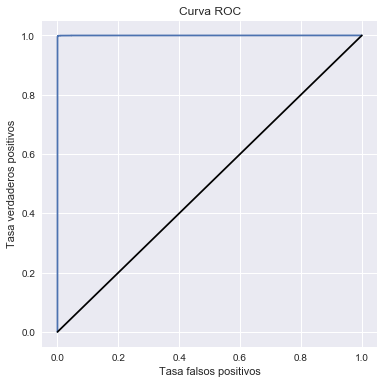

In [122]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

rmfc = RandomForestClassifier(n_estimators=50, max_features = 'sqrt')

pipe = Pipeline([
    ('imp',Imputer()),
    ('std',StandardScaler()),
    ('for', rmfc)
])
eval_model(pipe, X_train, Y_train, X_dev, Y_dev)

### 1.1 Grid Search para el Random Forest

In [34]:
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([
    ('imp',Imputer()),
    ('std',StandardScaler()),
    ('for',RandomForestClassifier())
])

param_range = [30, 40, 50, 60]

param_grid = {'for__n_estimators': param_range}

param_grid = [{'for__n_estimators': param_range,'for__max_features': ['auto']},
              {'for__n_estimators': param_range,'for__max_features': ['sqrt']}]

gs = GridSearchCV(estimator=pipe,
                  param_grid=param_grid,
                  scoring='accuracy')

gs = gs.fit(X_train, Y_train)
print(gs.best_score_)
print(gs.best_params_)

0.933490196078
{'for__max_features': 'sqrt', 'for__n_estimators': 50}


## 2. Naive Bayes


Evaluación en el conjunto de entrenamiento:
             precision    recall  f1-score   support

          0       0.96      0.94      0.95    118984
          1       0.36      0.49      0.41      8516

avg / total       0.92      0.91      0.91    127500

Roc_auc_score: 0.841993363602

Evaluación en el conjunto de validación:
             precision    recall  f1-score   support

          0       0.96      0.94      0.95     20990
          1       0.36      0.50      0.42      1510

avg / total       0.92      0.91      0.91     22500

Roc_auc_score: 0.846979719135


C:\Users\anaalbcru\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


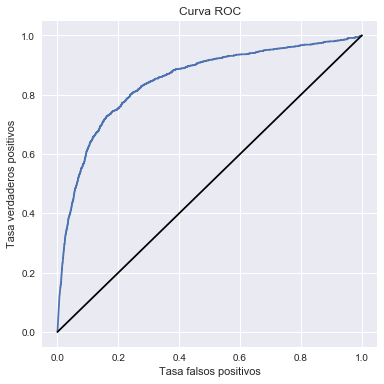

In [78]:
from sklearn.naive_bayes import GaussianNB

gnv = GaussianNB()
pipe = Pipeline([
    ('imp',Imputer()),
    ('std',StandardScaler()),
    ('nb',gnv)
])

eval_model(pipe, X_train, Y_train, X_dev, Y_dev)

## 3. kNN


Evaluación en el conjunto de entrenamiento:
             precision    recall  f1-score   support

          0       0.95      0.99      0.97    118984
          1       0.69      0.31      0.43      8516

avg / total       0.93      0.94      0.93    127500

Roc_auc_score: 0.951378263256

Evaluación en el conjunto de validación:
             precision    recall  f1-score   support

          0       0.94      0.98      0.96     20990
          1       0.48      0.20      0.28      1510

avg / total       0.91      0.93      0.92     22500

Roc_auc_score: 0.733955163134


C:\Users\anaalbcru\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


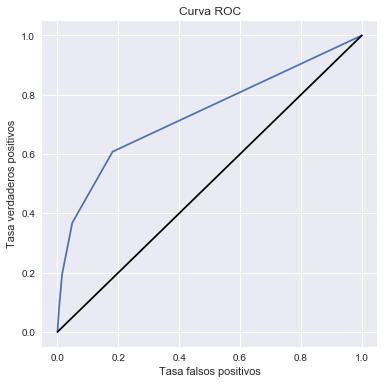

In [79]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

pipe = Pipeline([
    ('imp',Imputer()),
    ('std',StandardScaler()),
    ('knn', knn)
])
eval_model(pipe, X_train, Y_train, X_dev, Y_dev)

## 4. SVC

In [ ]:
from sklearn.svm import SVC

pipe = Pipeline([
    ('imp',Imputer()),
    ('std',StandardScaler()),
    ('svc',SVC(C = 0.5))
])
eval_model(pipe, X_train, Y_train, X_dev, Y_dev)

## 5. Gradient Boosting Regression


Evaluación en el conjunto de entrenamiento:
             precision    recall  f1-score   support

          0       0.95      0.99      0.97    139974
          1       0.63      0.20      0.30     10026

avg / total       0.92      0.94      0.92    150000

Roc_auc_score: 0.870054705181

Evaluación en el conjunto de validación:
             precision    recall  f1-score   support

          0       0.95      0.99      0.97     70041
          1       0.63      0.20      0.31      4959

avg / total       0.93      0.94      0.92     75000

Roc_auc_score: 0.869398106895


C:\Users\anaalbcru\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


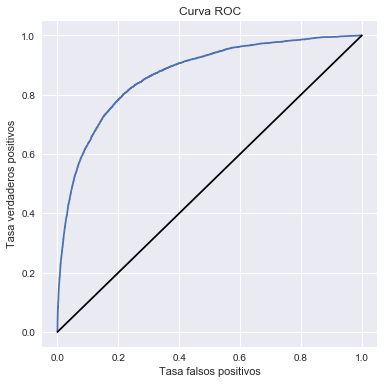

In [54]:
from sklearn.ensemble import GradientBoostingClassifier

gbMod = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=200, subsample=1.0,
                                   min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3,
                                   init=None, random_state=None, max_features=None, verbose=0)

pipe = Pipeline([
    ('imp',Imputer()),
    ('std',StandardScaler()),
    ('gbMod', gbMod)
])
eval_model(pipe, X_train, Y_train, X_dev, Y_dev)

## 6. AdaBoostRegressor


Evaluación en el conjunto de entrenamiento:
             precision    recall  f1-score   support

          0       0.95      0.99      0.97     70039
          1       0.56      0.20      0.29      4961

avg / total       0.92      0.94      0.92     75000

Roc_auc_score: 0.86323351986

Evaluación en el conjunto de validación:
             precision    recall  f1-score   support

          0       0.94      0.99      0.97     69935
          1       0.54      0.20      0.29      5065

avg / total       0.92      0.93      0.92     75000

Roc_auc_score: 0.859328918525


C:\Users\anaalbcru\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


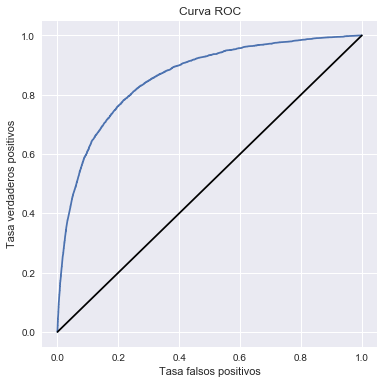

In [44]:
from sklearn.ensemble import AdaBoostClassifier

adaMod = AdaBoostClassifier(base_estimator=None, n_estimators=100, learning_rate=1.0)

pipe = Pipeline([
    ('imp',Imputer()),
    ('std',StandardScaler()),
    ('adaMod', adaMod)
])
eval_model(pipe, X_train, Y_train, X_dev, Y_dev)

# Cross-Validation

In [45]:
def cvDictGen(functions, scr, X_train=X_train, y_train=Y_train, cv=3, verbose=1):
    cvDict = {}
    for func in functions:
        cvScore = cross_val_score(func, X_train, y_train, cv=cv, verbose=verbose, scoring=scr)
        cvDict[str(func).split('(')[0]] = [cvScore.mean(), cvScore.std()]
    
    return cvDict

In [47]:
from sklearn.model_selection import cross_val_score
cvDictGen(functions=[rmfc, gnv, knn, gbMod, adaMod], scr='roc_auc')

NameError: name 'knn' is not defined

# Grid Search

## AdaBoost Grid Search

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.grid_search import RandomizedSearchCV
from scipy.stats import randint

adaHyperParams = {'algorithm' : ['SAMME', 'SAMME.R'],
                 'n_estimators': randint(10, 500)}


adaMod = AdaBoostClassifier()

gridSearchGB = RandomizedSearchCV(estimator=adaMod, param_distributions=adaHyperParams, n_iter=10,
                                   scoring='roc_auc', fit_params=None, cv=None, verbose=2).fit(X_train, Y_train)
gridSearchGB.best_params_, gridSearchGB.best_score_


C:\Users\anaalbcru\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\anaalbcru\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] algorithm=SAMME.R, n_estimators=164 .............................
[CV] .................... algorithm=SAMME.R, n_estimators=164 -   6.7s
[CV] algorithm=SAMME.R, n_estimators=164 .............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.7s remaining:    0.0s


[CV] .................... algorithm=SAMME.R, n_estimators=164 -   6.6s
[CV] algorithm=SAMME.R, n_estimators=164 .............................
[CV] .................... algorithm=SAMME.R, n_estimators=164 -   5.9s
[CV] algorithm=SAMME.R, n_estimators=68 ..............................
[CV] ..................... algorithm=SAMME.R, n_estimators=68 -   2.4s
[CV] algorithm=SAMME.R, n_estimators=68 ..............................
[CV] ..................... algorithm=SAMME.R, n_estimators=68 -   3.0s
[CV] algorithm=SAMME.R, n_estimators=68 ..............................
[CV] ..................... algorithm=SAMME.R, n_estimators=68 -   3.8s
[CV] algorithm=SAMME.R, n_estimators=300 .............................
[CV] .................... algorithm=SAMME.R, n_estimators=300 -  14.1s
[CV] algorithm=SAMME.R, n_estimators=300 .............................
[CV] .................... algorithm=SAMME.R, n_estimators=300 -  13.6s
[CV] algorithm=SAMME.R, n_estimators=300 .............................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  5.5min finished


({'algorithm': 'SAMME', 'n_estimators': 437}, 0.8573693462539959)

In [209]:
gridSearchGB.best_estimator_.fit(X_train, Y_train)

AdaBoostClassifier(algorithm='SAMME', base_estimator=None, learning_rate=1.0,
          n_estimators=323, random_state=None)

In [213]:
ada_mejorado = AdaBoostClassifier(algorithm='SAMME', base_estimator=None, learning_rate=1.0,
          n_estimators=323, random_state=None)

pipe = Pipeline([
    ('imp',Imputer()),
    ('std',StandardScaler()),
    ('gbMod', ada_mejorado)
])

pipe.fit(X_train, Y_train)
predicted_test = pipe.predict(credit_test_df)
scores_test = pipe.predict_proba(credit_test_df)[:,1]

submission = pd.DataFrame({'Id': credit_test_df.index.values +1, 'Probability': scores_test})
submission.to_csv('file3.csv', index = False)

## Gradient Boost Randomized Search

In [55]:
from sklearn.grid_search import RandomizedSearchCV
from scipy.stats import randint

gbHyperParams = {'loss' : ['deviance', 'exponential'],
                 'n_estimators': randint(10, 500),
                 'max_depth': randint(1,10)}

gridSearchGB = RandomizedSearchCV(estimator=gbMod, param_distributions=gbHyperParams, n_iter=10,
                                   scoring='roc_auc', fit_params=None, cv=None, verbose=2).fit(X_train, Y_train)
gridSearchGB.best_params_, gridSearchGB.best_score_

# 'loss': 'deviance', 'max_depth': 4, 'n_estimators': 93

C:\Users\anaalbcru\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\anaalbcru\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] loss=exponential, max_depth=5, n_estimators=276 .................
[CV] ........ loss=exponential, max_depth=5, n_estimators=276 -  43.1s
[CV] loss=exponential, max_depth=5, n_estimators=276 .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   43.1s remaining:    0.0s


[CV] ........ loss=exponential, max_depth=5, n_estimators=276 -  42.2s
[CV] loss=exponential, max_depth=5, n_estimators=276 .................
[CV] ........ loss=exponential, max_depth=5, n_estimators=276 -  40.7s
[CV] loss=deviance, max_depth=1, n_estimators=455 ....................
[CV] ........... loss=deviance, max_depth=1, n_estimators=455 -  13.3s
[CV] loss=deviance, max_depth=1, n_estimators=455 ....................
[CV] ........... loss=deviance, max_depth=1, n_estimators=455 -  13.1s
[CV] loss=deviance, max_depth=1, n_estimators=455 ....................
[CV] ........... loss=deviance, max_depth=1, n_estimators=455 -  13.7s
[CV] loss=deviance, max_depth=6, n_estimators=483 ....................
[CV] ........... loss=deviance, max_depth=6, n_estimators=483 - 1.8min
[CV] loss=deviance, max_depth=6, n_estimators=483 ....................
[CV] ........... loss=deviance, max_depth=6, n_estimators=483 - 1.7min
[CV] loss=deviance, max_depth=6, n_estimators=483 ....................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 46.0min finished


({'loss': 'exponential', 'max_depth': 2, 'n_estimators': 456},
 0.8632813718153367)

In [59]:
bestGbModFitted  = gridSearchGB.best_estimator_.fit(X_train, Y_train)

In [60]:
bestGbModFitted 

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=456,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

## Imbalanced classificator - No mejora

In [119]:
from imblearn.over_sampling import SMOTE

onehot_encoder = OneHotEncoder(sparse=False)
imputer = Imputer()
std_scaler = StandardScaler()

gb_mejorado = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=93,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

X_train2 = imputer.fit_transform(X_train)
X_train2 = std_scaler.fit_transform(X_train2)
X_train2, Y_train2 = SMOTE().fit_sample(X_train2, Y_train)
gb_mejorado.fit(X_train2, Y_train2)

Y_train_predicted = gb_mejorado.predict(X_train2)
Y_train_scores = gb_mejorado.predict_proba(X_train2)[:,1]
print("Evaluation on trainig set")
print(classification_report(Y_train2, Y_train_predicted))

ModuleNotFoundError: No module named 'imblearn'

In [135]:
X_test2 = imputer.transform(credit_test_df)
X_test2 = std_scaler.transform(X_test2)
Y_test_predicted = gb_mejorado.predict(X_test2)
Y_test_scores = gb_mejorado.predict_proba(X_test2)[:,1]

In [136]:
submission = pd.DataFrame({'Id': credit_test_df.index.values +1, 'Probability': Y_test_scores})
submission.to_csv('file2.csv', index = False)

## Probamos con GB

In [129]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import GradientBoostingClassifier

gb_mejorado = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=456,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)


pipe = Pipeline([
    ('imp',Imputer()),
    ('std',StandardScaler()),
    ('select_feat', SelectKBest(f_classif, k=10)),
    ('gbMod', gb_mejorado)
])

pipe.fit(X_train, Y_train)
predicted_test = pipe.predict(credit_test_df)
scores_test = pipe.predict_proba(credit_test_df)[:,1]

submission = pd.DataFrame({'Id': credit_test_df.index.values +1, 'Probability': scores_test})
submission.to_csv('file1.csv', index = False)

## Deep Learning with h2o (Neural Network)

In [62]:
import h2o

In [63]:
get_ipython().magic(u'matplotlib inline')
#IMPORT ALL THE THINGS

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from h2o.estimators.deeplearning import H2OAutoEncoderEstimator, H2ODeepLearningEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator

In [64]:
h2o.init(max_mem_size = 2)        
h2o.remove_all()    

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM (Zulu 8.20.0.5-win64) (build 25.121-b15, mixed mode)
  Starting server from C:\Users\anaalbcru\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\ANAALB~1\AppData\Local\Temp\tmp7fteqxr9
  JVM stdout: C:\Users\ANAALB~1\AppData\Local\Temp\tmp7fteqxr9\h2o_anaalbcru_started_from_python.out
  JVM stderr: C:\Users\ANAALB~1\AppData\Local\Temp\tmp7fteqxr9\h2o_anaalbcru_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,03 secs
H2O cluster timezone:,Europe/Paris
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.3
H2O cluster version age:,5 days
H2O cluster name:,H2O_from_python_anaalbcru_yq31py
H2O cluster total nodes:,1
H2O cluster free memory:,1.778 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [108]:
df_H2O = h2o.H2OFrame(credit_df)
train,test,valid = df_H2O.split_frame(ratios=[.8, .1])

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [110]:
X = train.col_names[1:]
y = train.col_names[0]
dl_model = H2ODeepLearningEstimator(hidden=[50,50,50], epochs=1000, standardize = True, activation = "Tanh")
dl_model.train(X, y, train)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [111]:
dl_model

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1520498328516_4


ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 0.047921196501903164
RMSE: 0.21890910557101814
MAE: 0.10168540146813934
RMSLE: 0.1528842345420952
Mean Residual Deviance: 0.047921196501903164
Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae
,2018-03-08 10:23:30,0.000 sec,None,0.0,0,0.0,nan,nan,nan
,2018-03-08 10:23:35,5.468 sec,18932 obs/sec,0.8318959,1,99830.0,0.2216288,0.0491193,0.1092705
,2018-03-08 10:23:40,10.768 sec,19033 obs/sec,1.6643084,2,199722.0,0.2210062,0.0488437,0.0940588
,2018-03-08 10:23:46,16.235 sec,18911 obs/sec,2.4971376,3,299664.0,0.2190648,0.0479894,0.0930114
,2018-03-08 10:23:51,21.721 sec,18846 obs/sec,3.3323917,4,399897.0,0.2211481,0.0489065,0.1098904
,2018-03-08 10:23:58,29.280 sec,18066 obs/sec,4.1663875,5,499979.0,0.2198314,0.0483258,0.0905891
,2018-03-08 10:24:10,40.257 sec,18150 obs/sec,5.8321542,7,699876.0,0.2201934,0.0484851,0.0910034
,2018-03-08 10:24:15,45.866 sec,18155 obs/sec,6.6670000,8,800060.0,0.2218179,0.0492032,0.1001818
,2018-03-08 10:24:21,51.420 sec,18171 obs/sec,7.4996625,9,899982.0,0.2213626,0.0490014,0.0833772
,2018-03-08 10:24:26,57.060 sec,18155 obs/sec,8.3330167,10,999987.0,0.2227268,0.0496072,0.0878452


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
MonthlyIncome,1.0,1.0,0.1940216
NumberOfDependents,0.6426947,0.6426947,0.1246967
DebtRatio,0.6014840,0.6014840,0.1167009
NumberOfOpenCreditLinesAndLoans,0.5703401,0.5703401,0.1106583
RevolvingUtilizationOfUnsecuredLines,0.5546119,0.5546119,0.1076067
age,0.4961728,0.4961728,0.0962682
NumberOfTimes90DaysLate,0.3550198,0.3550198,0.0688815
NumberOfTime30-59DaysPastDueNotWorse,0.3314379,0.3314379,0.0643061
NumberRealEstateLoansOrLines,0.3255533,0.3255533,0.0631644
NumberOfTime60-89DaysPastDueNotWorse,0.2767507,0.2767507,0.0536956


In [89]:
x_test=test[1:]
scores_test = dl_model.predict(x_test)
scores_test.describe()

deeplearning prediction progress: |███████████████████████████████████████| 100%
Rows:15022
Cols:1




,predict
type,real
mins,-0.08947164959667664
mean,0.06824583700710796
maxs,0.9713003154865925
sigma,0.10107086949319251
zeros,0
missing,0
0,0.040740440651246906
1,0.02533155246953813
2,0.07219114772724533


In [86]:
test_H2O = h2o.H2OFrame(X_test)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [112]:
scores_test = dl_model.predict(test_H2O)
scores_test.describe()

deeplearning prediction progress: |███████████████████████████████████████| 100%
Rows:101503
Cols:1




,predict
type,real
mins,-0.02292475858680977
mean,0.07078761537072852
maxs,0.7211738644425959
sigma,0.11233645380146322
zeros,0
missing,0
0,0.04953395066739562
1,0.10852802358962338
2,0.024470897789455055


In [113]:
scores=scores_test.as_data_frame(use_pandas=True)

In [114]:
scores=scores.as_matrix(columns=scores.columns[0:])

In [115]:
scores=scores[:,0]

In [116]:
scores[ scores < 0] = 0

In [117]:
submission = pd.DataFrame({'Id': credit_test_df.index.values +1, 'Probability': scores})
submission.to_csv('dl.csv', index = False)

In [60]:
h2o.cluster().shutdown()

## Confusion Matrix

In [125]:
def plot_confusion_matrix(y_true, y_pred, title = 'Confusion matrix', cmap=plt.cm.Blues):
    from sklearn.metrics import classification_report
    from sklearn.metrics import confusion_matrix
    print ('Classification Report:\n')
    print (classification_report(y_test, y_pred))
    cm = confusion_matrix(y_true, y_pred)
    def plot_confusion_matrix_plot(cm, title = 'Confusion matrix', cmap=plt.cm.Blues):
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(y_test.unique()))
        plt.xticks(tick_marks, rotation=45)
        plt.yticks(tick_marks)
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
    
    print ('\n Confusion matrix, without normalization: \n')
    print (cm)
    plot_confusion_matrix_plot(cm=cm)
    
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('\n Normalized confusion matrix \n')
    print(cm_normalized)
    plt.figure()
    plot_confusion_matrix_plot(cm_normalized, title='Normalized confusion matrix')

def makePredThresh(fittedCls, thr = 0.5, X_test=X_test):
    prob = fittedCls.predict_proba(X_test)[: ,1]
    final = []
    for p in prob:
        if p >= thr:
            final.append(1)
        else:
            final.append(0)
    
    return final

In [126]:
pred = makePredThresh(gb_mejorado, thr=0.0645)

In [127]:
plot_confusion_matrix(Y_dev, pred)

Classification Report:



NameError: name 'y_test' is not defined